<a href="https://colab.research.google.com/github/NgocCanh2002/BTVN/blob/main/nhandiengao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhandiengao/Train', target_size=(128,128), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhandiengao/Test', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 370 images belonging to 18 classes.
Found 190 images belonging to 18 classes.


In [5]:
training_set.class_indices
test_set.class_indices

{'gao 4900': 0,
 'gao 504': 1,
 'gao 5451': 2,
 'gao 6976': 3,
 'gao ST21': 4,
 'gao ST25': 5,
 'gao bac huong': 6,
 'gao den': 7,
 'gao ham chau': 8,
 'gao lut': 9,
 'gao nang hoa': 10,
 'gao nang sen': 11,
 'gao nep': 12,
 'gao tai nguyen': 13,
 'gao thom': 14,
 'gao thom lai': 15,
 'gao tim than': 16,
 'gao vang': 17}

In [6]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(370, 128, 128, 3)
(370, 18)


In [7]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)


(190, 128, 128, 3)
(190, 18)


In [8]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(18, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [9]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [10]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
12/12 - 14s - loss: 3.0242 - accuracy: 0.0405 - 14s/epoch - 1s/step
Epoch 2/100
12/12 - 13s - loss: 2.8885 - accuracy: 0.0838 - 13s/epoch - 1s/step
Epoch 3/100
12/12 - 14s - loss: 2.8740 - accuracy: 0.0973 - 14s/epoch - 1s/step
Epoch 4/100
12/12 - 12s - loss: 2.8129 - accuracy: 0.1378 - 12s/epoch - 1s/step
Epoch 5/100
12/12 - 13s - loss: 2.7389 - accuracy: 0.1351 - 13s/epoch - 1s/step
Epoch 6/100
12/12 - 12s - loss: 2.6327 - accuracy: 0.2162 - 12s/epoch - 1s/step
Epoch 7/100
12/12 - 12s - loss: 2.5638 - accuracy: 0.2324 - 12s/epoch - 1s/step
Epoch 8/100
12/12 - 12s - loss: 2.2470 - accuracy: 0.3216 - 12s/epoch - 1s/step
Epoch 9/100
12/12 - 12s - loss: 1.9070 - accuracy: 0.4514 - 12s/epoch - 1s/step
Epoch 10/100
12/12 - 13s - loss: 1.5012 - accuracy: 0.5432 - 13s/epoch - 1s/step
Epoch 11/100
12/12 - 12s - loss: 1.1776 - accuracy: 0.6486 - 12s/epoch - 1s/step
Epoch 12/100
12/12 - 12s - loss: 0.8571 - accuracy: 0.7784 - 12s/epoch - 1s/step
Epoch 13/100
12/12 - 12s - loss: 0.73

In [11]:
Score=model.evaluate(x_train,y_train,verbose=2)
print('Sai số: ', Score[0])
print('Độ chính xác: ', Score[1])

12/12 - 4s - loss: 5.9347e-05 - accuracy: 1.0000 - 4s/epoch - 293ms/step
Sai số:  5.9346835769247264e-05
Độ chính xác:  1.0


<function matplotlib.pyplot.show(*args, **kw)>

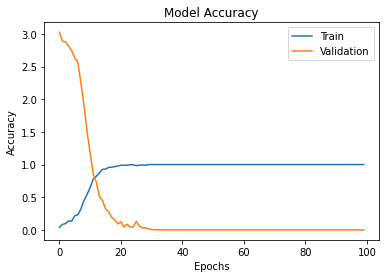

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [14]:
model.save("Nhan_dien_gao_CNN.h5")

In [15]:
model_CNN=load_model('/content/Nhan_dien_gao_CNN.h5')

In [16]:
class_names = ["gao 4900", "gao 504", "gao 5451","gao 6976","gao st21","gao st25","gao bac huong","gao den","gao ham chau","gao lut","gao nang hoa","gao nang sen","gao nep","gao tai nguyen","gao thom","gao thom lai","gao tim than","gao vang"]

1/1 [==============================] - 0s 42ms/step
[[3.8000445e-12 2.2077305e-10 1.3484685e-03 1.0113427e-04 2.0174028e-05
  1.6054131e-09 9.8292418e-08 4.9752469e-09 1.9291621e-12 4.7065765e-07
  4.1270003e-02 1.6584364e-06 7.6098389e-05 8.3484215e-01 3.4145739e-08
  7.0978400e-14 8.8789649e-02 3.3550031e-02]]
Kết quả:  gao tai nguyen
Độ chính xác:  0.83484215


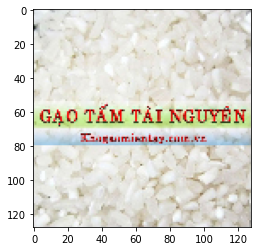

In [28]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = '/content/drive/MyDrive/Colab Notebooks/nhandiengao/Validation/gao (61).jpg'
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)